This notebook is written for exploring the importance and significance of different features.

# Importing Necessary Modules

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import chi2,f_classif, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# Load The Clean Dataset

In [2]:
df = pd.read_csv('../../datasets/PCOS_clean_data_without_infertility.csv')
df.head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
PCOS (Y/N),0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Age (yrs),28.00,36.00,33.00,37.00,25.00,36.00,34.00,33.00,32.00,36.00,20.00,26.00
Weight (Kg),44.60,65.00,68.80,65.00,52.00,74.10,64.00,58.50,40.00,52.00,71.00,49.00
Height(Cm),152.00,161.50,165.00,148.00,161.00,165.00,156.00,159.00,158.00,150.00,163.00,160.00
BMI,19.30,24.92,25.27,29.67,20.06,27.22,26.30,23.14,16.02,23.11,26.72,19.14
Blood Group,15.00,15.00,11.00,13.00,11.00,15.00,11.00,13.00,11.00,15.00,15.00,13.00
Pulse rate(bpm),78.00,74.00,72.00,72.00,72.00,78.00,72.00,72.00,72.00,80.00,80.00,72.00
RR (breaths/min),22.00,20.00,18.00,20.00,18.00,28.00,18.00,20.00,18.00,20.00,20.00,20.00
Hb(g/dl),10.48,11.70,11.80,12.00,10.00,11.20,10.90,11.00,11.80,10.00,10.00,9.50
Cycle(R/I),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              538 non-null    int64  
 1   Age (yrs)               538 non-null    int64  
 2   Weight (Kg)             538 non-null    float64
 3   Height(Cm)              538 non-null    float64
 4   BMI                     538 non-null    float64
 5   Blood Group             538 non-null    int64  
 6   Pulse rate(bpm)         538 non-null    int64  
 7   RR (breaths/min)        538 non-null    int64  
 8   Hb(g/dl)                538 non-null    float64
 9   Cycle(R/I)              538 non-null    int64  
 10  Cycle length(days)      538 non-null    int64  
 11  Marraige Status (Yrs)   538 non-null    float64
 12  Pregnant(Y/N)           538 non-null    int64  
 13  No. of aborptions       538 non-null    int64  
 14  I   beta-HCG(mIU/mL)    538 non-null    fl

In [4]:
print(df['PCOS (Y/N)'].value_counts())

0    362
1    176
Name: PCOS (Y/N), dtype: int64


# Splitting Categorical And Numerical Features

In [5]:
df_cat = df[["Age (yrs)",
            "Pregnant(Y/N)",
             "Cycle(R/I)",
             "Blood Group",
             "Cycle length(days)",
             "No. of aborptions",
             "Weight gain(Y/N)",
             "hair growth(Y/N)",
             "Skin darkening (Y/N)",
             "Hair loss(Y/N)",
             "Pimples(Y/N)",
             "Fast food (Y/N)",
             "Reg.Exercise(Y/N)",
             
]]

In [6]:
df_cat.shape

(538, 13)

In [7]:
df_target = df[["PCOS (Y/N)"]]

In [8]:
df_corr_num = df.drop(df_cat.columns,axis=1)

In [9]:
list(df_corr_num.columns)

['PCOS (Y/N)',
 'Weight (Kg)',
 'Height(Cm)',
 'BMI',
 'Pulse rate(bpm)',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Marraige Status (Yrs)',
 'I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

In [10]:
df_num = df.drop(df_cat.columns,axis=1)
df_num.drop(["PCOS (Y/N)"], axis=1, inplace= True)

In [11]:
df_corr_num = pd.concat([df_target, df_num], axis=1, sort = False)
#pd.concat([df1, df4], axis=1, sort=False)

In [12]:
df_corr_num.head()

,PCOS (Y/N),Weight (Kg),Height(Cm),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Marraige Status (Yrs),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),...,Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,44.6,152.0,19.30,78,22,10.48,7.0,1.99,1.99,...,17.1,0.57,92.0,110,80,3,3,18.0,18.0,8.5
1,0,65.0,161.5,24.92,74,20,11.70,11.0,60.80,1.99,...,61.3,0.97,92.0,120,70,3,5,15.0,14.0,3.7
2,1,68.8,165.0,25.27,72,18,11.80,10.0,494.08,494.08,...,49.7,0.36,84.0,120,80,13,15,18.0,20.0,10.0
3,0,65.0,148.0,29.67,72,20,12.00,4.0,1.99,1.99,...,33.4,0.36,76.0,120,70,2,2,15.0,14.0,7.5
4,0,52.0,161.0,20.06,72,18,10.00,1.0,801.45,801.45,...,43.8,0.38,84.0,120,80,3,4,16.0,14.0,7.0


# Finding Correlations

# Kendall's Method

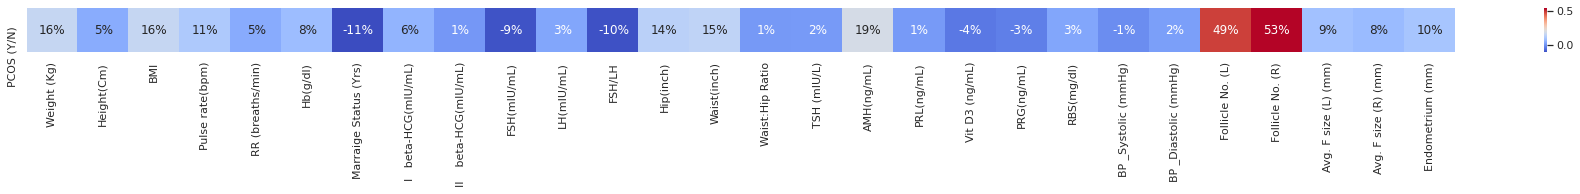

In [13]:
# Numerical Input - Categorical Output
# Kendall's Method
plt.figure(figsize=(32, .8))
sns.heatmap(
    data=df_corr_num.corr('kendall').iloc[:1, 1:],
    annot=True,
    fmt='.0%',
    cmap='coolwarm'
    
    
);

# Chi Square

In [14]:
chi2(df_cat,df_target)[0]

array([14.70744141,  0.25349022, 62.44807843,  0.1503457 ,  8.18879387,
        2.93170268, 65.57462287, 84.87561637, 86.41344383,  9.15831179,
       23.09660161, 37.73891888,  2.10350412])

In [15]:
chi2(df_cat,df_target)[1] # p-values

array([1.25549881e-04, 6.14628158e-01, 2.73562597e-15, 6.98205214e-01,
       4.21499375e-03, 8.68558453e-02, 5.59546449e-16, 3.17737490e-20,
       1.45989104e-20, 2.47590879e-03, 1.54062757e-06, 8.08748208e-10,
       1.46962000e-01])

In [16]:
pd.DataFrame.from_records(np.reshape(chi2(df_cat,df_target)[1], (1,-1)), index= list(df_target.columns), columns=list(df_cat.columns)) # p-values

,Age (yrs),Pregnant(Y/N),Cycle(R/I),Blood Group,Cycle length(days),No. of aborptions,Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N)
PCOS (Y/N),0.000126,0.614628,2.735626e-15,0.698205,0.004215,0.086856,5.595464e-16,3.177375e-20,1.459891e-20,0.002476,0.000002,8.087482e-10,0.146962


In [17]:
df_corr_chi = pd.DataFrame.from_records(np.reshape(chi2(df_cat,df_target)[0], (1,-1)), index= list(df_target.columns), columns=list(df_cat.columns))

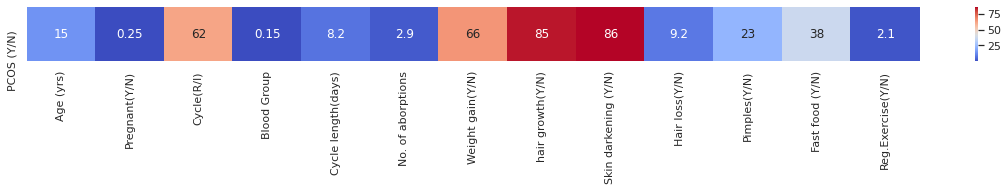

In [18]:
# Categorical Input - Categorical Output
# Chi Square Method
plt.figure(figsize=(20, 1))
sns.heatmap(
    data= df_corr_chi,
    annot=True,
    cmap='coolwarm'
)

# Annova Test

In [19]:
f_classif(df_num,df_target)[0] # F Values

array([2.47204934e+01, 2.30698185e+00, 2.21711792e+01, 4.64587340e+00,
       8.01515711e-01, 4.16485799e+00, 6.98326536e+00, 4.22784533e-01,
       8.79401882e-02, 4.95290026e-01, 2.20958696e+00, 1.83747614e-01,
       1.42419967e+01, 1.44316636e+01, 4.84276517e-02, 1.49252846e-02,
       4.01471949e+01, 1.45829047e-03, 3.97746095e+00, 1.03483275e+00,
       1.31401221e+00, 1.01575621e-01, 2.11700656e-01, 3.03402426e+02,
       3.94085650e+02, 9.21367234e+00, 4.83264708e+00, 6.28299880e+00])

In [20]:
f_classif(df_num,df_target)[1] # p-values

array([8.93511564e-07, 1.29383520e-01, 3.18009420e-06, 3.15727969e-02,
       3.71042444e-01, 4.17602572e-02, 8.46809794e-03, 5.15829464e-01,
       7.66927166e-01, 4.81882595e-01, 1.37743348e-01, 6.68344400e-01,
       1.78678196e-04, 1.61981707e-04, 8.25906006e-01, 9.02810902e-01,
       4.99587903e-10, 9.69552350e-01, 4.66190847e-02, 3.09485239e-01,
       2.52180988e-01, 7.50071112e-01, 6.45624287e-01, 3.53883814e-54,
       3.75443723e-66, 2.51881944e-03, 2.83524288e-02, 1.24851292e-02])

In [21]:
# P-Values
annova = pd.DataFrame.from_records(np.reshape(f_classif(df_num,df_target)[1], (1,-1)), index= list(df_target.columns), columns=list(df_num.columns)) # p-values

In [22]:
annova.T

,PCOS (Y/N)
Weight (Kg),8.935116e-07
Height(Cm),1.293835e-01
BMI,3.180094e-06
Pulse rate(bpm),3.157280e-02
RR (breaths/min),3.710424e-01
Hb(g/dl),4.176026e-02
Marraige Status (Yrs),8.468098e-03
I beta-HCG(mIU/mL),5.158295e-01
II beta-HCG(mIU/mL),7.669272e-01
FSH(mIU/mL),4.818826e-01


In [23]:
# F - Values
pd.DataFrame.from_records(np.reshape(f_classif(df_num,df_target)[0], (1,-1)), index= list(df_target.columns), columns=list(df_num.columns)) 

,Weight (Kg),Height(Cm),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Marraige Status (Yrs),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),...,Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
PCOS (Y/N),24.720493,2.306982,22.171179,4.645873,0.801516,4.164858,6.983265,0.422785,0.08794,0.49529,...,3.977461,1.034833,1.314012,0.101576,0.211701,303.402426,394.08565,9.213672,4.832647,6.282999


## EDA (Exploratory Data Analysis)

0    389
1    149
Name: Cycle(R/I), dtype: int64


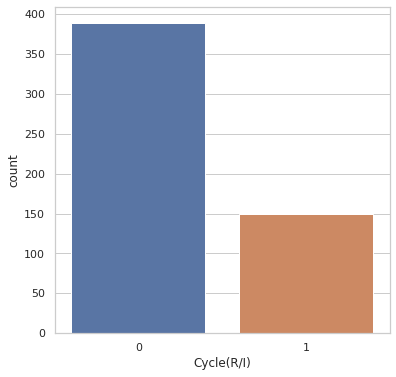

In [24]:
print(df_cat['Cycle(R/I)'].value_counts())
plt.figure(figsize=(6, 6))
sns.countplot(
    x='Cycle(R/I)',
    data=df_cat
);

0    390
1    148
Name: hair growth(Y/N), dtype: int64


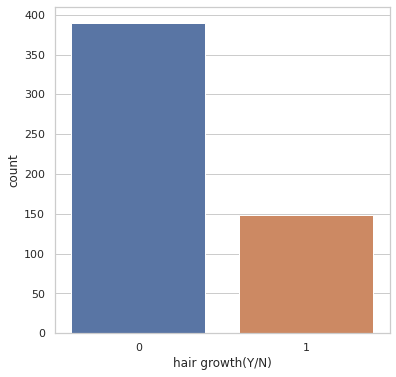

In [25]:
print(df_cat['hair growth(Y/N)'].value_counts())
plt.figure(figsize=(6, 6))
sns.countplot(
    x='hair growth(Y/N)',
    data=df_cat
);

In [26]:
df_C = df[df['Cycle length(days)'] == 11]
print(df_C["PCOS (Y/N)"].value_counts())

0    3
1    2
Name: PCOS (Y/N), dtype: int64


28    45
32    44
30    37
35    37
29    34
27    34
31    33
26    32
36    32
34    29
33    25
38    20
25    18
23    18
40    15
24    15
37    14
39     9
41     9
22     8
20     6
42     6
45     4
47     3
43     3
44     3
21     3
46     1
48     1
Name: Age (yrs), dtype: int64


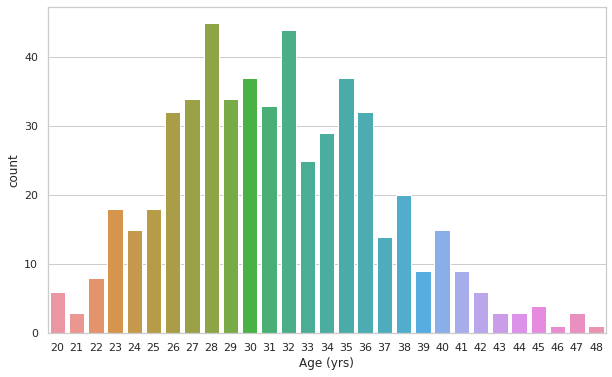

In [27]:
print(df_cat['Age (yrs)'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(
    x='Age (yrs)',
    data=df_cat
);

4.0     52
3.0     51
8.0     48
5.0     46
10.0    44
7.0     43
6.0     38
2.0     29
12.0    29
13.0    24
11.0    16
9.0     16
15.0    14
1.0     13
14.0    12
16.0     8
2.5      7
18.0     7
3.5      7
17.0     6
1.5      5
6.5      4
23.0     2
20.0     2
22.0     2
19.0     2
4.5      2
30.0     2
25.0     2
0.0      1
8.5      1
7.5      1
24.0     1
2.2      1
Name: Marraige Status (Yrs), dtype: int64


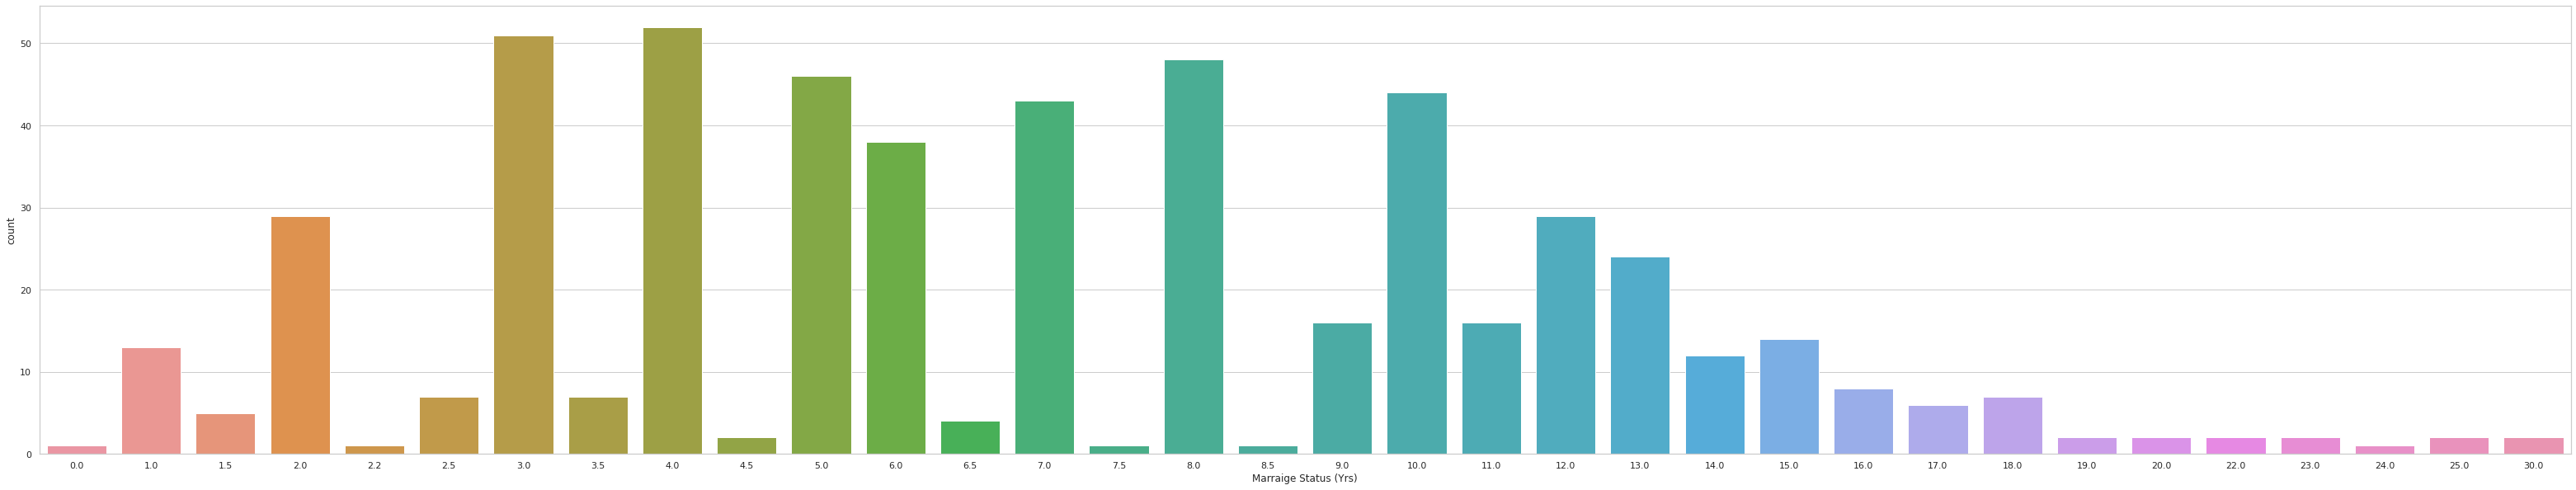

In [28]:
print(df_corr_num['Marraige Status (Yrs)'].value_counts())
plt.figure(figsize=(55, 10))
sns.countplot(
    x='Marraige Status (Yrs)',
    data=df_corr_num
);

In [29]:
# df_C = df_cat[df_cat['Marraige Status (Yrs)'] == 8.0]
# print(df_C["PCOS (Y/N)"].value_counts())

0    434
1     69
2     22
3     10
4      2
5      1
Name: No. of aborptions, dtype: int64


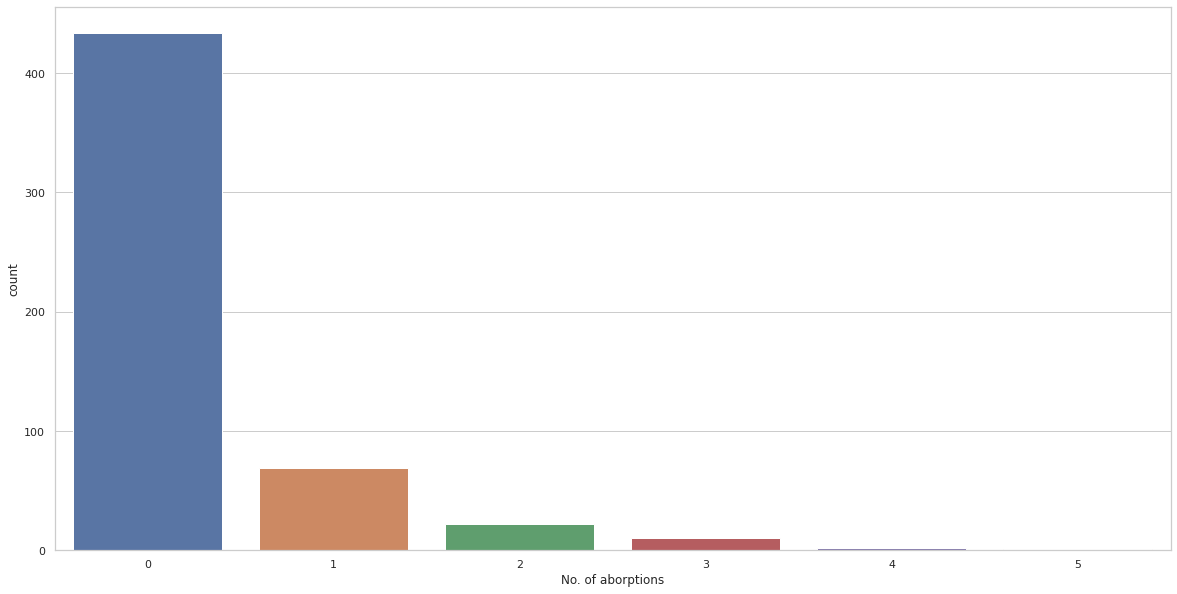

In [30]:
print(df_cat['No. of aborptions'].value_counts())
plt.figure(figsize=(20, 10))
sns.countplot(
    x='No. of aborptions',
    data=df_cat
);

In [31]:
df_C = df[df['I   beta-HCG(mIU/mL)'] >= 5]
print(df_C["PCOS (Y/N)"].value_counts())

0    201
1    105
Name: PCOS (Y/N), dtype: int64


In [32]:
df_C = df[df['II    beta-HCG(mIU/mL)'] >= 5]
print(df_C["PCOS (Y/N)"].value_counts())

0    137
1     66
Name: PCOS (Y/N), dtype: int64


110    264
120    251
100     13
130      8
140      2
Name: BP _Systolic (mmHg), dtype: int64


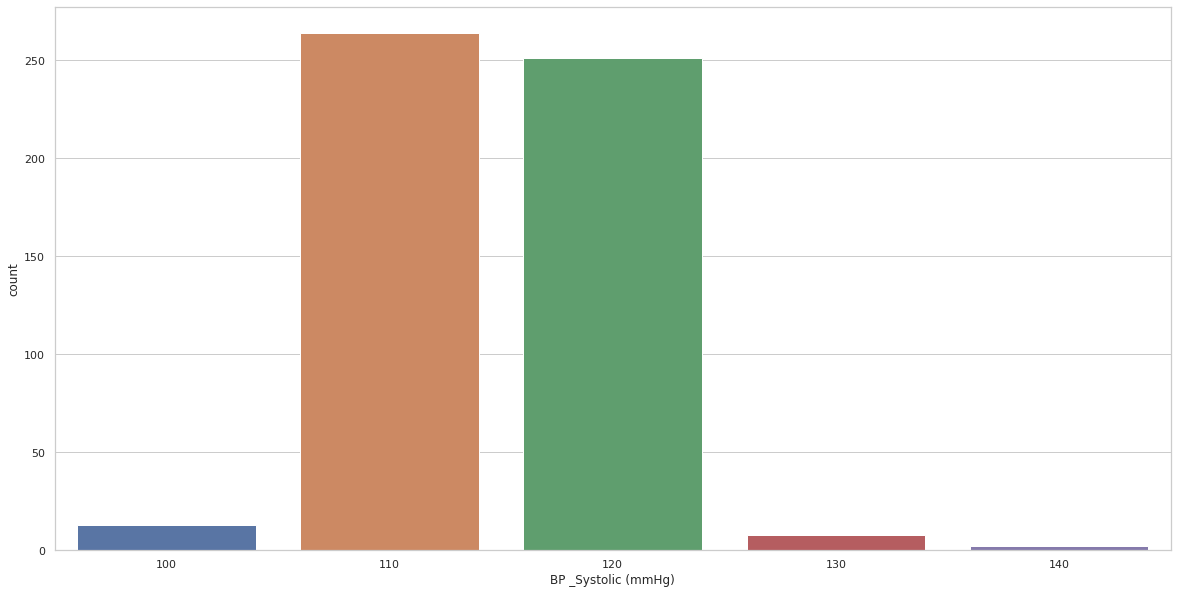

In [33]:
print(df['BP _Systolic (mmHg)'].value_counts())
plt.figure(figsize=(20, 10))
sns.countplot(
    x='BP _Systolic (mmHg)',
    data=df
);

80     379
70     157
100      1
60       1
Name: BP _Diastolic (mmHg), dtype: int64


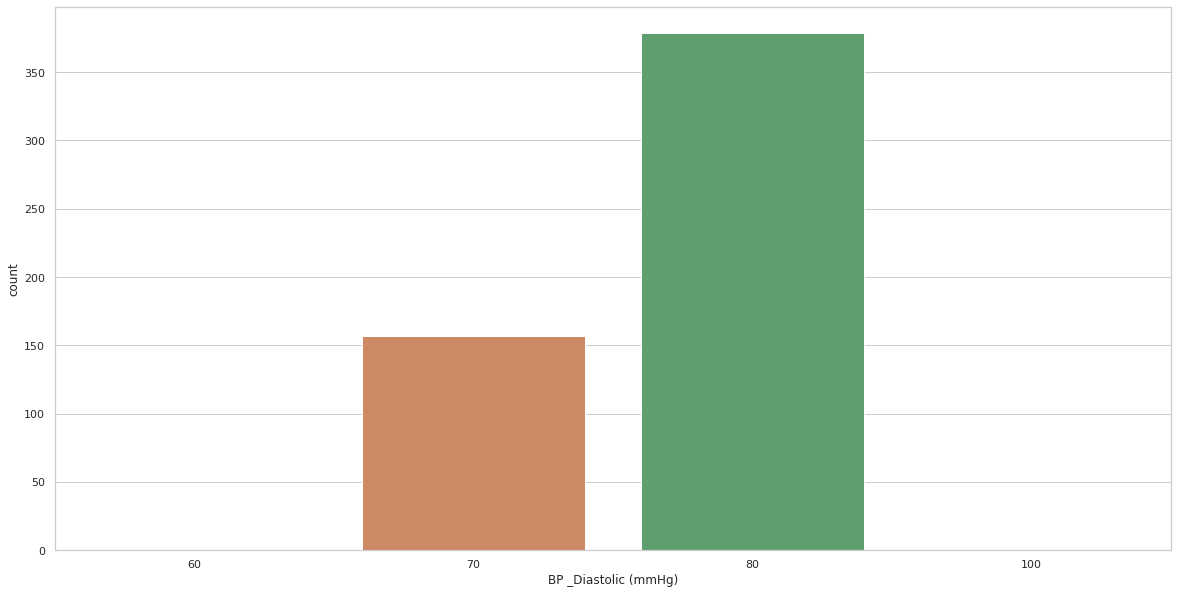

In [34]:
print(df['BP _Diastolic (mmHg)'].value_counts())
plt.figure(figsize=(20, 10))
sns.countplot(
    x='BP _Diastolic (mmHg)',
    data=df
);